In [30]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from skimage.feature import hog, orb
from sklearn.metrics import confusion_matrix
import seaborn as sns
from skimage.feature import hog, orb
from skimage.feature import local_binary_pattern as lbp
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.utils import to_categorical

# Helper Functions

In [31]:
def imshow(image, title=None):
    plt.axis('off')
    plt.title(title)
    plt.imshow(image, 'gray')
    plt.show()
def showGridImage(images, labels, gsize=5,title=None):
    '''
    Function shows Multiple images.
    params: 
    images--> [Req] array of images flatten to 100*100
    labels --> [Req] array of labels (image class)
    gsize --> [opt, default=5] size for the grid gsize x gsize
    title --> [opt, default=None] title for the grid
    '''
    selected_indices = np.random.choice(len(images), size=gsize*gsize, replace=False)

    # Create a 5x5 grid for subplots
    fig, axes = plt.subplots(gsize,gsize, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        index = selected_indices[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"Image {classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Loading Dataset

In [59]:
mainPath = './Image Classification/'
classes=os.listdir(mainPath)
# print(classes)
images = []
labels = []
for c in classes:
    p=os.path.join(mainPath,c)
    i=os.listdir(p)
    for k in i:
        print(os.path.join(p,k))

./Image Classification/Cars\07car1.jpg
./Image Classification/Cars\1-corvette-stingray-c8-2019-fd-hr-hero-front_0.jpg
./Image Classification/Cars\15-classic-cars-that-define-cool-hero-1000x600.jpg
./Image Classification/Cars\1_title_2020_mazda_miata.jpg
./Image Classification/Cars\2018_Toyota_Corolla_(ZRE172R)_Ascent_sedan_(2018-11-02)_01.jpg
./Image Classification/Cars\2020-audi-rs7-112-1569274021.jpg
./Image Classification/Cars\57263_2020_Mercedes_Benz_GLS.jpg
./Image Classification/Cars\6.jpg
./Image Classification/Cars\861a4abe_2fec_44aa_aa21_c79ceca1cdc3_660_080520125004.jpg
./Image Classification/Cars\960x0.jpg
./Image Classification/Cars\aug_0_2518.jpg
./Image Classification/Cars\aug_0_3170.jpg
./Image Classification/Cars\aug_0_4047.jpg
./Image Classification/Cars\aug_0_4717.jpg
./Image Classification/Cars\aug_0_514.jpg
./Image Classification/Cars\aug_0_6826.jpg
./Image Classification/Cars\aug_0_8162.jpg
./Image Classification/Cars\aug_0_844.jpg
./Image Classification/Cars\aug_0

In [60]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
images = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        images.append(image.flatten())
        label = classes.index(cls)
        labels.append(label)

In [62]:
print(len(images))
print(len(labels))

987
987


# Converting to numpy arrays

In [63]:
images = np.array(images)
labels = np.array(labels)

# Showing images from dataset

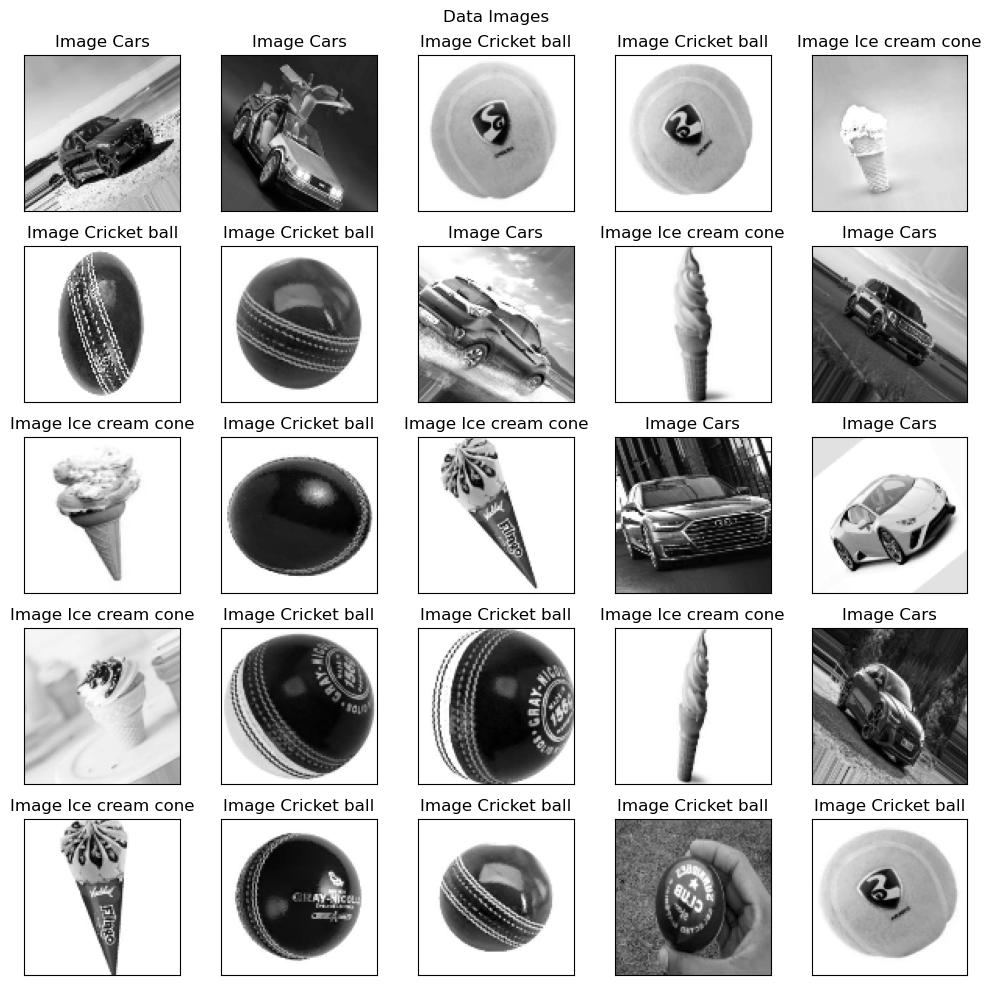

In [34]:
showGridImage(images,labels ,5, 'Data Images')

# Train_test_Split
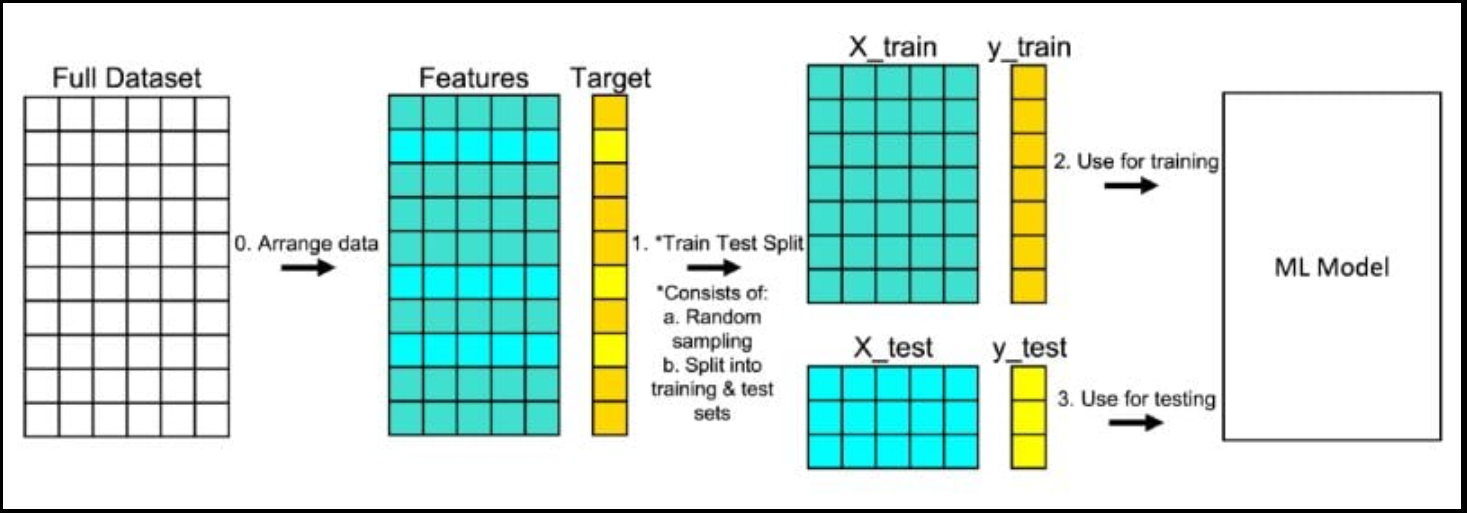

# Spliting into train and test

In [64]:
xTrain, xTest, yTrain, yTest = train_test_split(images, labels, test_size=0.2, random_state=0)

In [66]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(789, 10000)
(789,)
(198, 10000)
(198,)


In [67]:
yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)

model = Sequential()
model.add(Dense(100, input_dim=10000, activation='relu'))
model.add(Dense(3, activation='softmax'))



In [68]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 100)               1000100   
                                                                 
 dense_28 (Dense)            (None, 3)                 303       
                                                                 
Total params: 1,000,403
Trainable params: 1,000,403
Non-trainable params: 0
_________________________________________________________________


In [69]:
#training the model
history = model.fit(xTrain, yTrain, epochs=40, batch_size=64, validation_data=(xTest, yTest))

Epoch 1/40
13/13 [==============================] - 1s 23ms/step - loss: 1536.0724 - accuracy: 0.3992 - val_loss: 183.3167 - val_accuracy: 0.4040
Epoch 2/40
13/13 [==============================] - 0s 15ms/step - loss: 82.5473 - accuracy: 0.5108 - val_loss: 80.9435 - val_accuracy: 0.5455
Epoch 3/40
13/13 [==============================] - 0s 15ms/step - loss: 36.4837 - accuracy: 0.6147 - val_loss: 25.0046 - val_accuracy: 0.6212
Epoch 4/40
13/13 [==============================] - 0s 18ms/step - loss: 19.2078 - accuracy: 0.6629 - val_loss: 48.8015 - val_accuracy: 0.4394
Epoch 5/40
13/13 [==============================] - 0s 14ms/step - loss: 18.3520 - accuracy: 0.6996 - val_loss: 21.2755 - val_accuracy: 0.6768
Epoch 6/40
13/13 [==============================] - 0s 14ms/step - loss: 12.7107 - accuracy: 0.7541 - val_loss: 14.9282 - val_accuracy: 0.6616
Epoch 7/40
13/13 [==============================] - 0s 14ms/step - loss: 12.2354 - accuracy: 0.7376 - val_loss: 48.3703 - val_accuracy: 0.4

# Ceating Dense model

In [70]:
model = Sequential()
model.add(Dense(100, input_dim=10000, activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 100)               1000100   
                                                                 
 dense_30 (Dense)            (None, 100)               10100     
                                                                 
 dense_31 (Dense)            (None, 100)               10100     
                                                                 
 dense_32 (Dense)            (None, 3)                 303       
                                                                 
Total params: 1,020,603
Trainable params: 1,020,603
Non-trainable params: 0
_________________________________________________________________


In [71]:
#training the model
history = model.fit(xTrain, yTrain, epochs=40, batch_size=64, validation_data=(xTest, yTest))

Epoch 1/40
13/13 [==============================] - 1s 27ms/step - loss: 569.5649 - accuracy: 0.3194 - val_loss: 320.3263 - val_accuracy: 0.3384
Epoch 2/40
13/13 [==============================] - 0s 14ms/step - loss: 282.5145 - accuracy: 0.3587 - val_loss: 124.1153 - val_accuracy: 0.3737
Epoch 3/40
13/13 [==============================] - 0s 16ms/step - loss: 72.8597 - accuracy: 0.5615 - val_loss: 87.1568 - val_accuracy: 0.5707
Epoch 4/40
13/13 [==============================] - 0s 17ms/step - loss: 49.6535 - accuracy: 0.6312 - val_loss: 42.1393 - val_accuracy: 0.6162
Epoch 5/40
13/13 [==============================] - 0s 15ms/step - loss: 31.1659 - accuracy: 0.6679 - val_loss: 56.0099 - val_accuracy: 0.5808
Epoch 6/40
13/13 [==============================] - 0s 17ms/step - loss: 28.7113 - accuracy: 0.6755 - val_loss: 33.9582 - val_accuracy: 0.6566
Epoch 7/40
13/13 [==============================] - 0s 16ms/step - loss: 17.9082 - accuracy: 0.7427 - val_loss: 20.7903 - val_accuracy: 0.

In [72]:
model_1=Sequential()
model_1.add(Dense(128,input_dim=100*100,activation='relu'))
model_1.add(Dense(100,activation='relu'))
model_1.add(Dense(64,activation='relu'))
model_1.add(Dense(32,activation='relu'))
model_1.add(Dense(3, activation='softmax'))

In [73]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               1280128   
                                                                 
 dense_34 (Dense)            (None, 100)               12900     
                                                                 
 dense_35 (Dense)            (None, 64)                6464      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1,301,671
Trainable params: 1,301,671
Non-trainable params: 0
_________________________________________________________________


# Extracting  Features

In [80]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
LPBFeaturesFlatten = []
LBPFeatures = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        lbpFeat = lbp(image, P=8, R=1, method='uniform')
        LBPFeatures.append(lbpFeat)
        LPBFeaturesFlatten.append(lbpFeat.flatten())
        label = classes.index(cls)
        labels.append(label)

In [77]:
features = np.array(LPBFeaturesFlatten)
labels = np.array(labels)

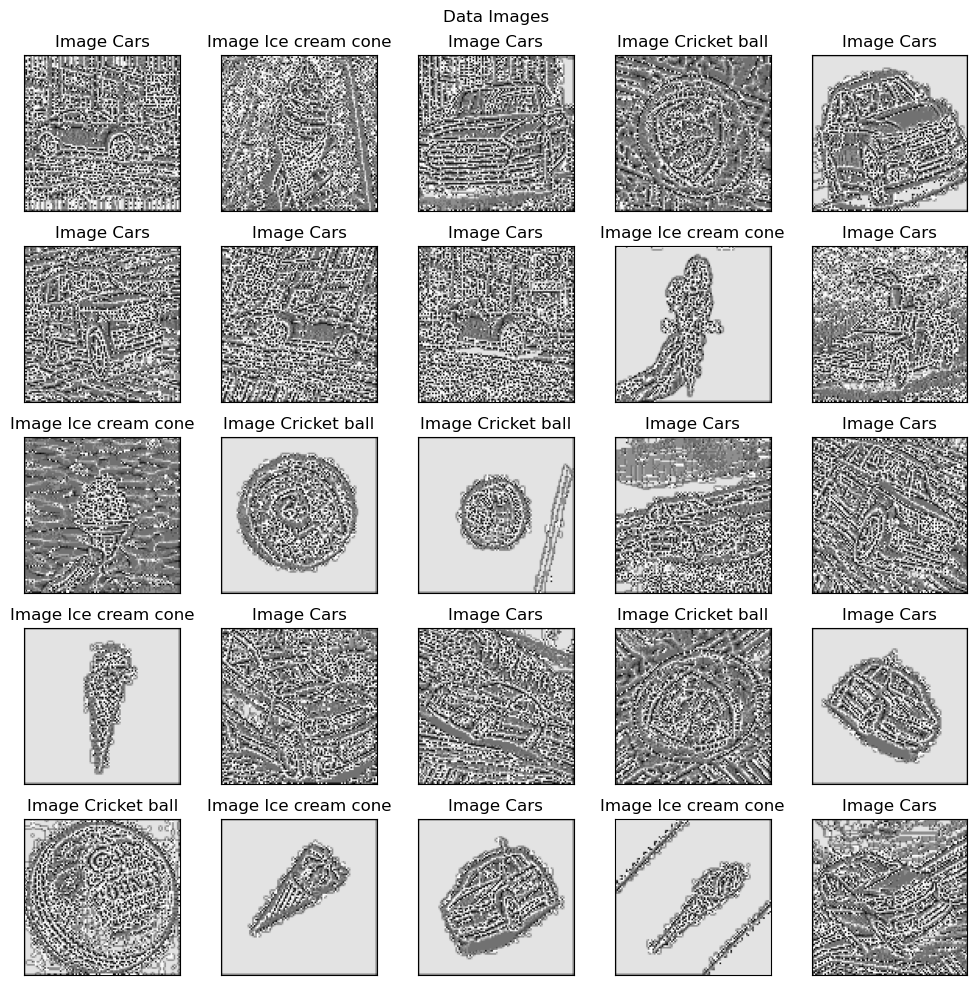

In [81]:
showGridImage(LBPFeatures,labels ,5, 'Data Images')

In [82]:
xTrain, xTest, yTrain, yTest = train_test_split(features, labels, test_size=0.2, random_state=0)
xTrainFeatures, xTestFeatures, yTrainFeatures, yTestFeatures = train_test_split(LBPFeatures, labels, test_size=0.2, random_state=0)

In [83]:
yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)

In [84]:
model = Sequential()
model.add(Dense(100, input_dim=100*100,activation='relu'))
model.add(Dense(3, activation='softmax'))


In [85]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 100)               1000100   
                                                                 
 dense_39 (Dense)            (None, 3)                 303       
                                                                 
Total params: 1,000,403
Trainable params: 1,000,403
Non-trainable params: 0
_________________________________________________________________


In [86]:
#training the model
history = model.fit(xTrain, yTrain, epochs=40, batch_size=64, validation_data=(xTest, yTest))

Epoch 1/40
13/13 [==============================] - 1s 27ms/step - loss: 43.2375 - accuracy: 0.3612 - val_loss: 24.3756 - val_accuracy: 0.3182
Epoch 2/40
13/13 [==============================] - 0s 15ms/step - loss: 18.1596 - accuracy: 0.3916 - val_loss: 15.0339 - val_accuracy: 0.3182
Epoch 3/40
13/13 [==============================] - 0s 15ms/step - loss: 9.8608 - accuracy: 0.3688 - val_loss: 7.4892 - val_accuracy: 0.4242
Epoch 4/40
13/13 [==============================] - 0s 14ms/step - loss: 4.2712 - accuracy: 0.5032 - val_loss: 2.2646 - val_accuracy: 0.5657
Epoch 5/40
13/13 [==============================] - 0s 14ms/step - loss: 1.5552 - accuracy: 0.6286 - val_loss: 2.9733 - val_accuracy: 0.5859
Epoch 6/40
13/13 [==============================] - 0s 16ms/step - loss: 1.1730 - accuracy: 0.6882 - val_loss: 2.0190 - val_accuracy: 0.6414
Epoch 7/40
13/13 [==============================] - 0s 14ms/step - loss: 0.8067 - accuracy: 0.7288 - val_loss: 1.6666 - val_accuracy: 0.6111
Epoch 8/4

# Creating  Dense model

In [87]:
model = Sequential()
model.add(Dense(100, input_dim=100*100,activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [88]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 100)               1000100   
                                                                 
 dense_41 (Dense)            (None, 100)               10100     
                                                                 
 dense_42 (Dense)            (None, 100)               10100     
                                                                 
 dense_43 (Dense)            (None, 3)                 303       
                                                                 
Total params: 1,020,603
Trainable params: 1,020,603
Non-trainable params: 0
_________________________________________________________________


In [89]:
#training the model
history = model.fit(xTrain, yTrain, epochs=40, batch_size=64, validation_data=(xTest, yTest))

Epoch 1/40
13/13 [==============================] - 1s 23ms/step - loss: 11.9821 - accuracy: 0.3181 - val_loss: 1.2079 - val_accuracy: 0.3030
Epoch 2/40
13/13 [==============================] - 0s 15ms/step - loss: 1.7262 - accuracy: 0.4081 - val_loss: 1.4200 - val_accuracy: 0.4091
Epoch 3/40
13/13 [==============================] - 0s 14ms/step - loss: 1.9304 - accuracy: 0.4487 - val_loss: 2.2450 - val_accuracy: 0.4444
Epoch 4/40
13/13 [==============================] - 0s 14ms/step - loss: 1.9401 - accuracy: 0.4689 - val_loss: 1.9524 - val_accuracy: 0.4596
Epoch 5/40
13/13 [==============================] - 0s 14ms/step - loss: 1.3276 - accuracy: 0.5146 - val_loss: 1.0607 - val_accuracy: 0.5101
Epoch 6/40
13/13 [==============================] - 0s 14ms/step - loss: 0.8189 - accuracy: 0.6629 - val_loss: 0.9483 - val_accuracy: 0.6263
Epoch 7/40
13/13 [==============================] - 0s 17ms/step - loss: 0.7677 - accuracy: 0.6958 - val_loss: 1.5969 - val_accuracy: 0.5101
Epoch 8/40
1